In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn import tree

In [4]:
df = pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [6]:
df = df.rename({'Undergrad':'under_grad', 'Marital.Status':'marital_status', 'Taxable.Income':'taxable_income', 'City.Population':'city_population','Work.Experience':'work_experience', 'Urban':'urban'}, axis = 1)

In [7]:
df

,under_grad,marital_status,taxable_income,city_population,work_experience,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   under_grad       600 non-null    object
 1   marital_status   600 non-null    object
 2   taxable_income   600 non-null    int64 
 3   city_population  600 non-null    int64 
 4   work_experience  600 non-null    int64 
 5   urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [9]:
df.describe()

,taxable_income,city_population,work_experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [10]:
import seaborn as sns

D:\yb python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='under_grad', ylabel='count'>

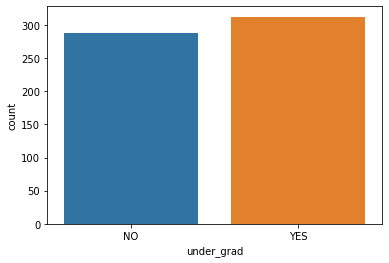

In [11]:
sns.countplot(df['under_grad'])

D:\yb python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital_status', ylabel='count'>

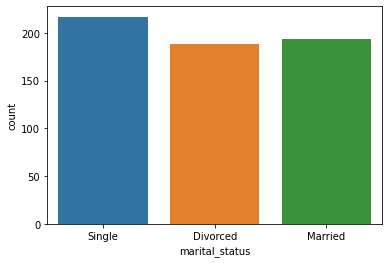

In [12]:
sns.countplot(df['marital_status'])

D:\yb python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='urban', ylabel='count'>

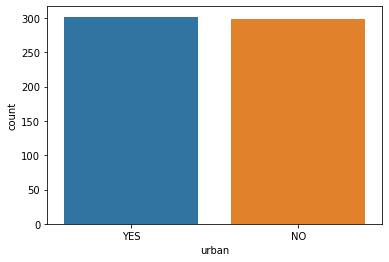

In [13]:
sns.countplot(df['urban'])

D:\yb python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='taxable_income'>

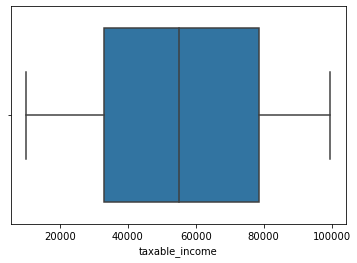

In [14]:
sns.boxplot(df['taxable_income'])

D:\yb python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city_population'>

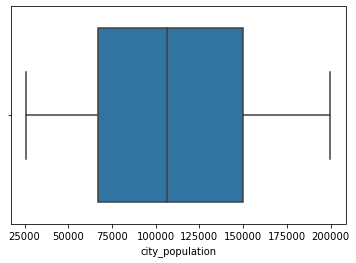

In [15]:
sns.boxplot(df['city_population'])

D:\yb python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='work_experience'>

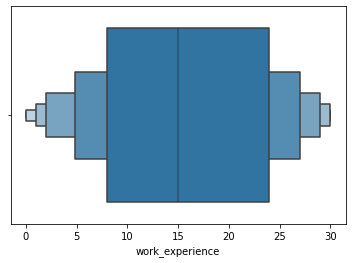

In [16]:
sns.boxenplot(df['work_experience'])

In [17]:
corr =df.corr()
corr

,taxable_income,city_population,work_experience
taxable_income,1.000000,-0.064387,-0.001818
city_population,-0.064387,1.000000,0.013135
work_experience,-0.001818,0.013135,1.000000


([<matplotlib.axis.YTick at 0x20649893df0>,
 [Text(0, 0, 'taxable_income'),
  Text(0, 1, 'city_population'),
  Text(0, 2, 'work_experience')])

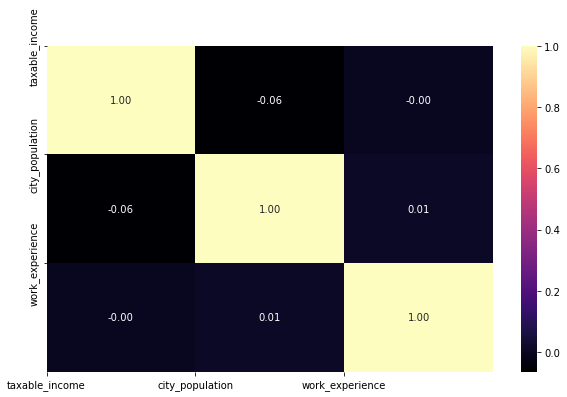

In [18]:
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, cmap= 'magma', annot = True, fmt = '.2f')
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

In [19]:
df['taxable_income'].min()

10003

In [20]:
df.taxable_income

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: taxable_income, Length: 600, dtype: int64

In [21]:
df['taxable_category'] = pd.cut(x = df['taxable_income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
df

,under_grad,marital_status,taxable_income,city_population,work_experience,urban,taxable_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


D:\yb python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='taxable_category', ylabel='count'>

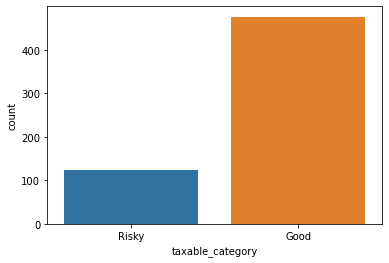

In [22]:
sns.countplot(df['taxable_category'])

In [23]:
df['taxable_category'].value_counts()

Good     476
Risky    124
Name: taxable_category, dtype: int64

In [24]:
label_en = preprocessing.LabelEncoder()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   under_grad        600 non-null    object  
 1   marital_status    600 non-null    object  
 2   taxable_income    600 non-null    int64   
 3   city_population   600 non-null    int64   
 4   work_experience   600 non-null    int64   
 5   urban             600 non-null    object  
 6   taxable_category  600 non-null    category
dtypes: category(1), int64(3), object(3)
memory usage: 29.0+ KB


In [26]:
df['under_grad'] = label_en.fit_transform(df['under_grad'])
df['marital_status'] = label_en.fit_transform(df['marital_status'])
df['urban'] = label_en.fit_transform(df['urban'])
df['taxable_category'] = label_en.fit_transform(df['taxable_category'])
df

,under_grad,marital_status,taxable_income,city_population,work_experience,urban,taxable_category
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [27]:
df1 = df.drop('taxable_income', axis =1)

In [28]:
df1.head()

,under_grad,marital_status,city_population,work_experience,urban,taxable_category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [29]:
corr1 = df1.corr()

([<matplotlib.axis.YTick at 0x20649983a60>,
 [Text(0, 0, 'under_grad'),
  Text(0, 1, 'marital_status'),
  Text(0, 2, 'city_population'),
  Text(0, 3, 'work_experience'),
  Text(0, 4, 'urban'),
  Text(0, 5, 'taxable_category')])

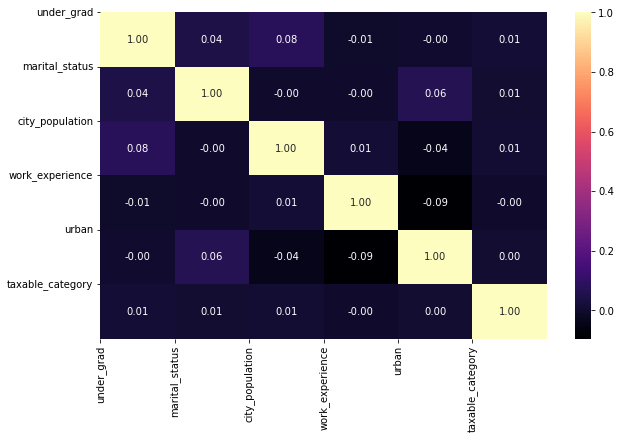

In [30]:
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr1, cmap= 'magma', annot = True, fmt = '.2f')
plt.xticks(range(len(corr1.columns)), corr1.columns)
plt.yticks(range(len(corr1.columns)), corr1.columns)

In [31]:
X = df1.drop('taxable_category', axis= 1)
y = df1['taxable_category']

In [32]:
X

,under_grad,marital_status,city_population,work_experience,urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [33]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: taxable_category, Length: 600, dtype: int32

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
X_train

,under_grad,marital_status,city_population,work_experience,urban
509,0,1,65531,27,1
149,0,2,49505,25,0
124,1,0,139324,13,0
428,1,1,128266,24,1
465,0,0,116282,21,0
...,...,...,...,...,...
71,0,2,105680,22,0
106,1,2,58535,20,1
270,0,1,130680,5,0
435,0,0,111774,4,1


In [36]:
X_test

,under_grad,marital_status,city_population,work_experience,urban
110,0,2,32450,19,1
419,0,1,138074,20,0
565,0,0,31064,28,0
77,1,1,118344,26,0
181,0,0,36116,20,0
...,...,...,...,...,...
231,1,2,153147,2,0
403,0,0,130912,27,1
278,0,1,114823,11,0
472,0,1,151963,11,1


In [37]:
y_train

509    1
149    0
124    0
428    1
465    1
      ..
71     0
106    1
270    0
435    0
102    0
Name: taxable_category, Length: 402, dtype: int32

In [38]:
y_test

110    1
419    0
565    0
77     0
181    1
      ..
231    0
403    0
278    1
472    0
350    0
Name: taxable_category, Length: 198, dtype: int32

In [39]:
model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.4230769230769231, 0.875, 'x[2] <= 60294.5\nentropy = 0.735\nsamples = 402\nvalue = [319, 83]'),
 Text(0.15384615384615385, 0.625, 'x[3] <= 6.5\nentropy = 0.611\nsamples = 93\nvalue = [79, 14]'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.23076923076923078, 0.375, 'x[3] <= 24.5\nentropy = 0.679\nsamples = 78\nvalue = [64, 14]'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.796\nsamples = 54\nvalue = [41, 13]'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.25\nsamples = 24\nvalue = [23, 1]'),
 Text(0.6923076923076923, 0.625, 'x[2] <= 64658.5\nentropy = 0.766\nsamples = 309\nvalue = [240, 69]'),
 Text(0.5384615384615384, 0.375, 'x[2] <= 63521.0\nentropy = 0.954\nsamples = 8\nvalue = [3, 5]'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.6153846153846154, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8461538461538461, 0.375, 'x[1] <= 0.5\nentropy = 0.746\nsamples = 301\n

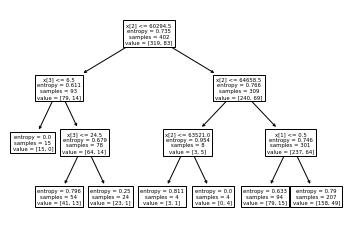

In [40]:
tree.plot_tree(model)

In [41]:
df1.columns

Index(['under_grad', 'marital_status', 'city_population', 'work_experience',
       'urban', 'taxable_category'],
      dtype='object')

[Text(0.4230769230769231, 0.875, 'city_population <= 60294.5\nentropy = 0.735\nsamples = 402\nvalue = [319, 83]\nclass = Risky'),
 Text(0.15384615384615385, 0.625, 'work_experience <= 6.5\nentropy = 0.611\nsamples = 93\nvalue = [79, 14]\nclass = Risky'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]\nclass = Risky'),
 Text(0.23076923076923078, 0.375, 'work_experience <= 24.5\nentropy = 0.679\nsamples = 78\nvalue = [64, 14]\nclass = Risky'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.796\nsamples = 54\nvalue = [41, 13]\nclass = Risky'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.25\nsamples = 24\nvalue = [23, 1]\nclass = Risky'),
 Text(0.6923076923076923, 0.625, 'city_population <= 64658.5\nentropy = 0.766\nsamples = 309\nvalue = [240, 69]\nclass = Risky'),
 Text(0.5384615384615384, 0.375, 'city_population <= 63521.0\nentropy = 0.954\nsamples = 8\nvalue = [3, 5]\nclass = Good'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.811\nsamples = 4\nval

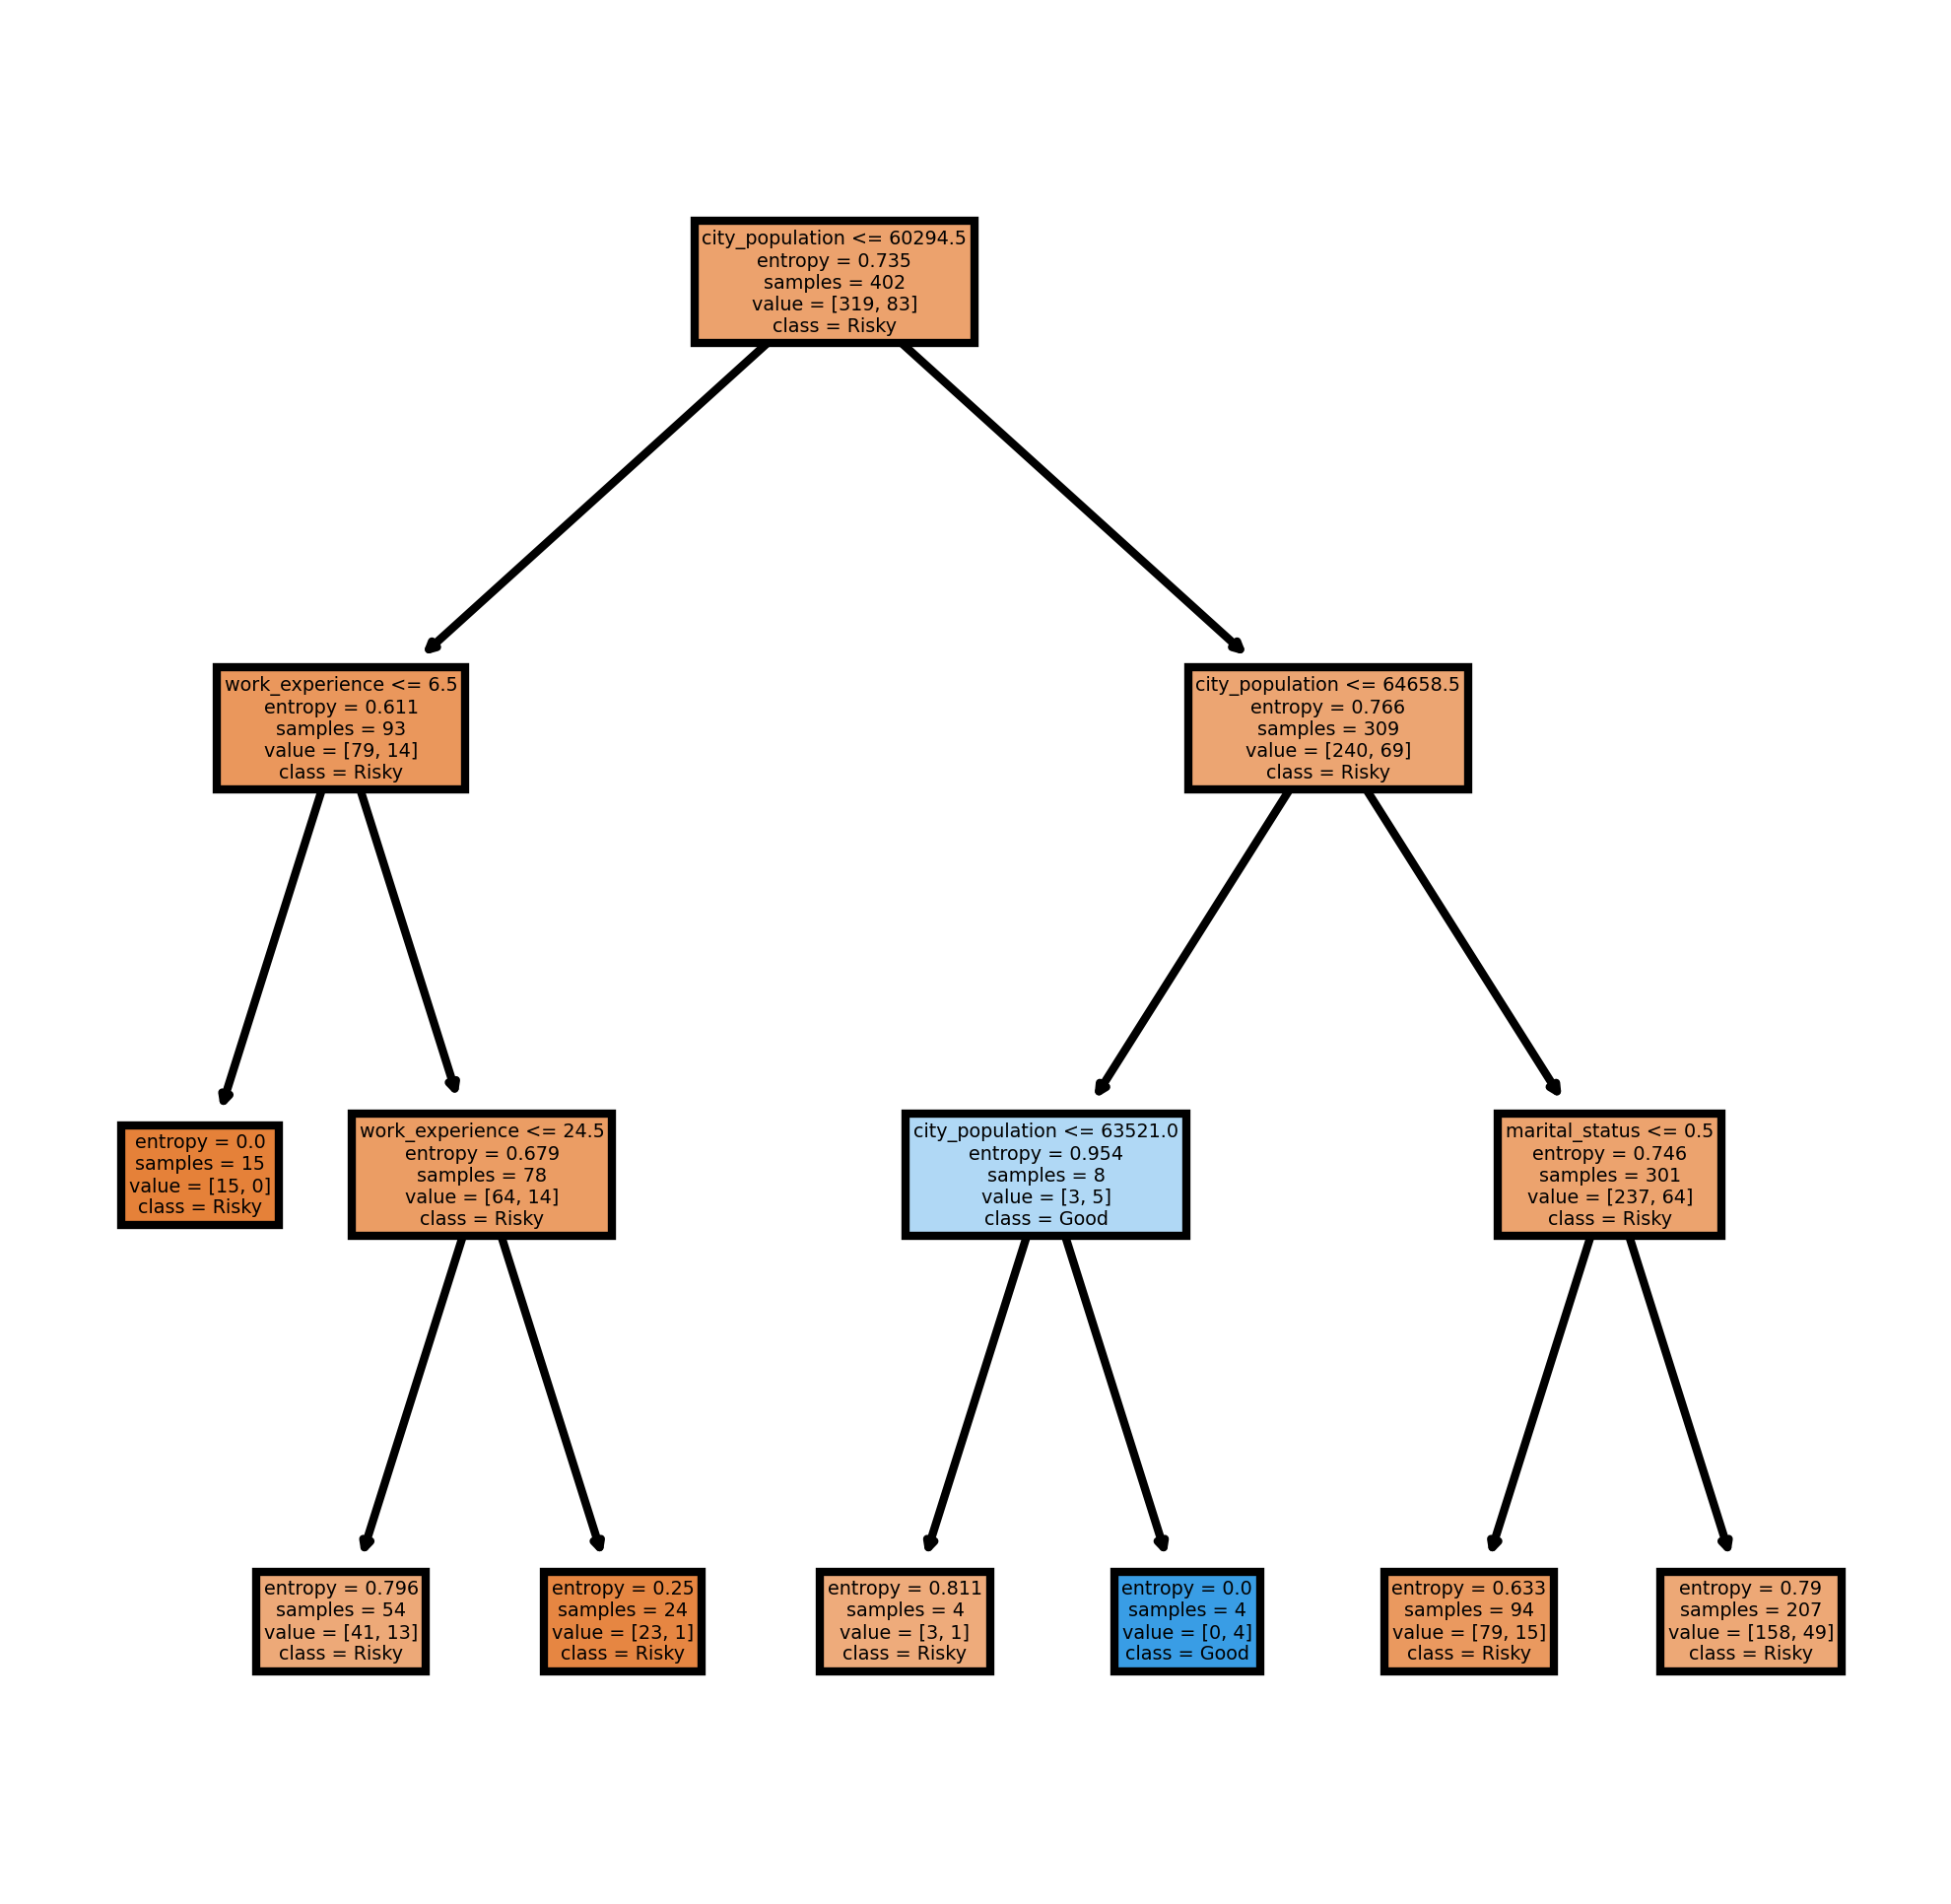

In [42]:
fn = ['under_grad', 'marital_status', 'city_population', 'work_experience',
       'urban', 'taxable_category']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(ncols= 1, nrows = 1, figsize=(4,4), dpi= 600)
tree.plot_tree(model,
              feature_names= fn,
              class_names= cn,
              filled= True)

In [43]:
preds = model.predict(X_test)
pd.Series(preds).value_counts()

0    197
1      1
dtype: int64

In [44]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
pd.crosstab(y_test, preds)

col_0,0,1
taxable_category,,
0,156,1
1,41,0


In [46]:
model.score(X_test, y_test)

0.7878787878787878

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier

In [48]:
fraud = pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [49]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [50]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [51]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [52]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [53]:
fraud['Risky'] = fraud['Taxable.Income'].map(lambda x : 1 if x <= 30000 else 0)

In [54]:
fraud['Risky'].value_counts()

0    476
1    124
Name: Risky, dtype: int64

In [55]:
fraud1 = fraud

In [56]:
fraud1['Urban'] = fraud['Urban'].astype('category')

In [57]:
fraud1['Urban']

0      YES
1      YES
2      YES
3      YES
4       NO
      ... 
595    YES
596    YES
597    YES
598     NO
599     NO
Name: Urban, Length: 600, dtype: category
Categories (2, object): ['NO', 'YES']

In [58]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Undergrad        600 non-null    object  
 1   Marital.Status   600 non-null    object  
 2   Taxable.Income   600 non-null    int64   
 3   City.Population  600 non-null    int64   
 4   Work.Experience  600 non-null    int64   
 5   Urban            600 non-null    category
 6   Risky            600 non-null    int64   
dtypes: category(1), int64(4), object(2)
memory usage: 29.0+ KB


In [59]:
fraud1['Urban'] = fraud1['Urban'].cat.codes

In [60]:
fraud1['Urban']

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban, Length: 600, dtype: int8

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
label_en = preprocessing.LabelEncoder()

In [63]:
fraud['Urban'] = label_en.fit_transform(fraud['Urban'])
fraud['Undergrad'] = label_en.fit_transform(fraud['Undergrad'])
fraud['Marital.Status'] = label_en.fit_transform(fraud['Marital.Status'])

In [64]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risky
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [65]:
X = fraud.drop(['Taxable.Income', 'Risky'], axis = 1)

In [66]:
y = fraud['Risky']

In [67]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [68]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Risky, Length: 600, dtype: int64

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [70]:
fraudmodel =  BaggingClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0)

In [71]:
fraudmodel = fraudmodel.fit(X_train, y_train)

In [72]:
y_predict = fraudmodel.predict(X_test)

In [73]:
print("Accuracy : ", accuracy_score(y_test,y_predict)*100 )

Accuracy :  80.0


In [74]:
print(confusion_matrix(y_test,y_predict))

[[96  1]
 [23  0]]


In [75]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89        97
           1       0.00      0.00      0.00        23

    accuracy                           0.80       120
   macro avg       0.40      0.49      0.44       120
weighted avg       0.65      0.80      0.72       120



In [79]:
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)

In [82]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [83]:
pred = model_gini.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [84]:
np.mean(pred==y_test)

0.8083333333333333